CNN from Scratch

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Step 1: Load CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [ ]:
# Step 2: Build CNN from Scratch
def build_custom_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

cnn_model = build_custom_cnn()
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(patience=3)
]

# Train CNN
history_cnn = cnn_model.fit(x_train, y_train_cat, epochs=30, batch_size=64,
                            validation_split=0.2, callbacks=callbacks, verbose=2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
625/625 - 13s - 21ms/step - accuracy: 0.3462 - loss: 1.7724 - val_accuracy: 0.4518 - val_loss: 1.5464 - learning_rate: 0.0010
Epoch 2/30
625/625 - 13s - 21ms/step - accuracy: 0.4908 - loss: 1.3956 - val_accuracy: 0.5038 - val_loss: 1.4282 - learning_rate: 0.0010
Epoch 3/30
625/625 - 5s - 8ms/step - accuracy: 0.5703 - loss: 1.2103 - val_accuracy: 0.5930 - val_loss: 1.1320 - learning_rate: 0.0010
Epoch 4/30
625/625 - 4s - 6ms/step - accuracy: 0.6189 - loss: 1.0901 - val_accuracy: 0.6528 - val_loss: 0.9891 - learning_rate: 0.0010
Epoch 5/30
625/625 - 5s - 8ms/step - accuracy: 0.6510 - loss: 1.0044 - val_accuracy: 0.7103 - val_loss: 0.8230 - learning_rate: 0.0010
Epoch 6/30
625/625 - 5s - 8ms/step - accuracy: 0.6721 - loss: 0.9425 - val_accuracy: 0.6853 - val_loss: 0.8937 - learning_rate: 0.0010
Epoch 7/30
625/625 - 5s - 8ms/step - accuracy: 0.6883 - loss: 0.8998 - val_accuracy: 0.6840 - val_loss: 0.8914 - learning_rate: 0.0010
Epoch 8/30
625/625 - 5s - 8ms/step - accuracy: 0.70

In [ ]:
# Step 3: Evaluate CNN
cnn_acc = cnn_model.evaluate(x_test, y_test_cat, verbose=0)[1]
print(f"Custom CNN Test Accuracy: {cnn_acc:.4f}")

Custom CNN Test Accuracy: 0.8003


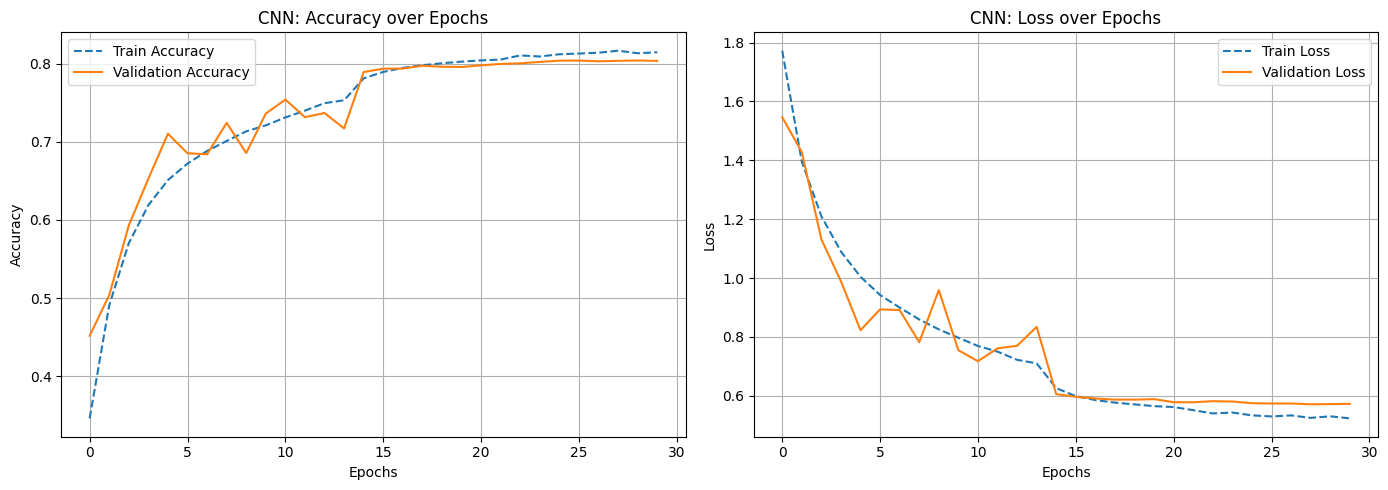

In [ ]:
import matplotlib.pyplot as plt

def plot_cnn_history(history):
    plt.figure(figsize=(14, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', linestyle='--')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('CNN: Accuracy over Epochs')
    plt.legend()
    plt.grid(True)

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', linestyle='--')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('CNN: Loss over Epochs')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Call this after training your CNN
plot_cnn_history(history_cnn)


Simple ResNet50 Transfer Learning on CIFAR-10

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


Load and Preprocess CIFAR-10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess input for ResNet50
x_train = tf.keras.applications.resnet50.preprocess_input(x_train)
x_test = tf.keras.applications.resnet50.preprocess_input(x_test)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Train shape: (50000, 32, 32, 3)
Test shape: (10000, 32, 32, 3)


In [4]:
# Load ResNet50 without top layers
base_model = ResNet50(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

# Freeze all layers except the last few
for layer in base_model.layers[:143]:
    layer.trainable = False

# Create Sequential model
model = Sequential([
    layers.Lambda(lambda image: tf.image.resize(image, (224, 224))),  # Resize CIFAR-10
    base_model,
    layers.Flatten(),
    layers.BatchNormalization(),
    layers.Dense(256, activation='swish'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(128, activation='swish'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax'),
])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
model.compile(
    optimizer=RMSprop(learning_rate=2e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

lr_schedule = ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.5, patience=1, min_lr=1e-6, verbose=1
)

early_stop = EarlyStopping(
    monitor='val_accuracy', mode='max', patience=2, restore_best_weights=True
)

history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=6,
    validation_split=0.2,
    callbacks=[early_stop, lr_schedule],
    verbose=1
)


Epoch 1/6
625/625 ━━━━━━━━━━━━━━━━━━━━ 198s 288ms/step - accuracy: 0.9938 - loss: 0.0483 - val_accuracy: 0.9416 - val_loss: 0.2063 - learning_rate: 2.0000e-05
Epoch 2/6
625/625 ━━━━━━━━━━━━━━━━━━━━ 191s 282ms/step - accuracy: 0.9946 - loss: 0.0368 - val_accuracy: 0.9422 - val_loss: 0.2149 - learning_rate: 2.0000e-05
Epoch 3/6
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.9962 - loss: 0.0277
Epoch 3: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
625/625 ━━━━━━━━━━━━━━━━━━━━ 159s 254ms/step - accuracy: 0.9962 - loss: 0.0277 - val_accuracy: 0.9421 - val_loss: 0.2184 - learning_rate: 2.0000e-05
Epoch 4/6
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 254ms/step - accuracy: 0.9982 - loss: 0.0199 - val_accuracy: 0.9446 - val_loss: 0.2138 - learning_rate: 1.0000e-05
Epoch 5/6
625/625 ━━━━━━━━━━━━━━━━━━━━ 158s 252ms/step - accuracy: 0.9982 - loss: 0.0166 - val_accuracy: 0.9466 - val_loss: 0.2121 - learning_rate: 1.0000e-05
Epoch 6/6
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


Test Accuracy: 94.30%


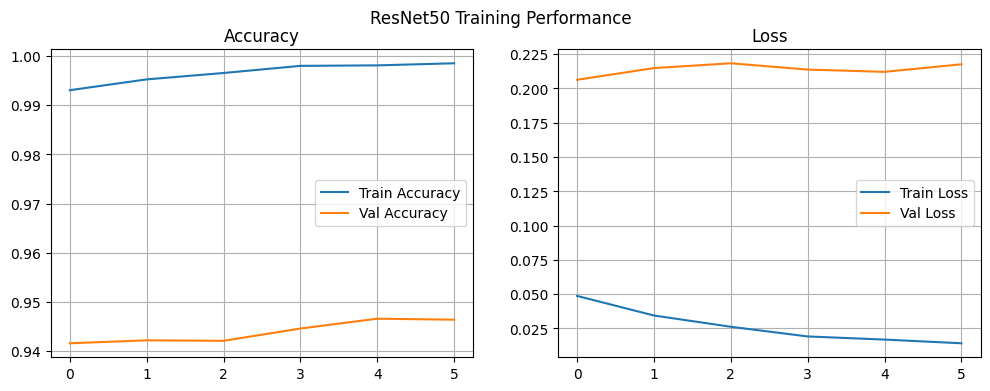

In [8]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.suptitle("ResNet50 Training Performance")

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title("Accuracy")
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title("Loss")
    plt.legend()
    plt.grid(True)

    plt.show()

plot_history(history)


Dataset Used:
CIFAR-10

10 classes of 32x32 color images

50,000 training images

10,000 test images


Comparison: CNN vs ResNet50

| **Aspect**           | **Custom CNN**            | **ResNet50 (Transfer Learning)**  |
| -------------------- | ------------------------- | --------------------------------- |
| Input Size           | 32x32                     | 224x224                           |
| Layers               | Manually defined          | Pre-trained ResNet50 + custom top |
| Training Time        | Moderate                  | Slightly longer                   |
                            |
| Test Accuracy        | 80.03%                     | 94.3%                             |
| Parameters           | Fewer                     | Much higher                       |
| Generalization       | Moderate                  | Strong                            |
| Use Case Suitability | Small models, quick tests | High-performance applications     |


The custom CNN model performs reasonably well, achieving an accuracy of 80.03%.

The transfer learning approach using ResNet50 outperforms the custom model with 94.3% accuracy.

Transfer learning is highly beneficial when using deep pre-trained models, especially when the dataset is relatively small or limited in complexity.

However, custom CNNs are faster to train and easier to understand or deploy on resource-limited devices.

